In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import RocCurveDisplay

In [54]:
y_true = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]
y_pred = [1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0]

In [70]:
# fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
# roc_auc = metrics.auc(fpr, tpr)

# # Plot ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate or (1 - Specifity)')
# plt.ylabel('True Positive Rate or (Sensitivity)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")

In [73]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np

In [76]:
n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)

In [74]:
classifier =  #TODO: load classifier model here

X = #TODO: add X data here
y = #TODO: add y data here

n_samples, n_features = X.shape

SyntaxError: invalid syntax (Temp/ipykernel_24568/1692452637.py, line 4)

NameError: name 'X' is not defined

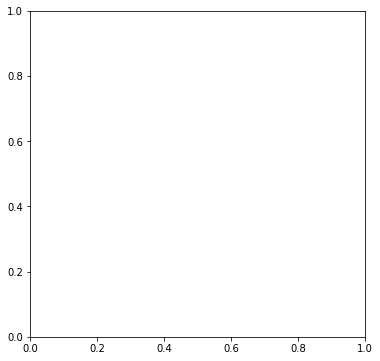

In [77]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

In [ ]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()